In [165]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm

In [166]:
#Download the dataset
! gdown 1DO6Nfw6w1KkVjTtwKl5iCvP_cev1rz0H

Downloading...
From: https://drive.google.com/uc?id=1DO6Nfw6w1KkVjTtwKl5iCvP_cev1rz0H
To: /content/Aerofit.csv
100% 7.28k/7.28k [00:00<00:00, 18.9MB/s]


In [167]:
# Read the dataset
df=pd.read_csv("Aerofit.csv")

In [168]:
# Shape of the dataset
df.shape

(180, 9)

In [169]:
# View top 5 lines in the data
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47


In [170]:
# Basic information fo the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


In [171]:
# Statistical measurements
df.describe(include="all")

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
count,180,180.000000,180,180.000000,180,180.000000,180.000000,180.000000,180.000000
unique,3,NaN,2,NaN,2,NaN,NaN,NaN,NaN
top,KP281,NaN,Male,NaN,Partnered,NaN,NaN,NaN,NaN
freq,80,NaN,104,NaN,107,NaN,NaN,NaN,NaN
mean,NaN,28.788889,NaN,15.572222,NaN,3.455556,3.311111,53719.577778,103.194444
std,NaN,6.943498,NaN,1.617055,NaN,1.084797,0.958869,16506.684226,51.863605
min,NaN,18.000000,NaN,12.000000,NaN,2.000000,1.000000,29562.000000,21.000000
25%,NaN,24.000000,NaN,14.000000,NaN,3.000000,3.000000,44058.750000,66.000000
50%,NaN,26.000000,NaN,16.000000,NaN,3.000000,3.000000,50596.500000,94.000000
75%,NaN,33.000000,NaN,16.000000,NaN,4.000000,4.000000,58668.000000,114.750000


In [172]:
#Unique Products
df["Product"].unique()

array(['KP281', 'KP481', 'KP781'], dtype=object)

In [173]:
#Checking dupliates in the data
df[df.duplicated]

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles


<Axes: >

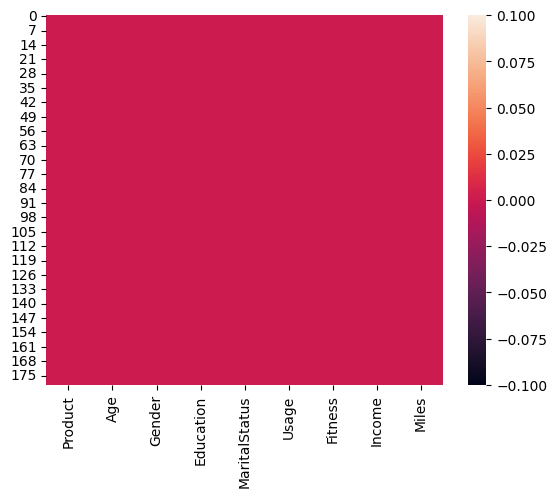

In [174]:
#Checking null values
sns.heatmap(df.isnull())

There are no null values in the data

Non-Graphical Analysis

In [175]:
#Top 5 age count of the customers
df["Age"].value_counts().head().reset_index().rename({"index":"age", "Age":"count"},axis=1)

,age,count
0,25,25
1,23,18
2,24,12
3,26,12
4,28,9


In [176]:
#Average age of the customers
round(df["Age"].mean(),2)

28.79

In [177]:
#Count of customers using the product
df["Product"].value_counts().reset_index().rename({"index":"product", "Product":"count"},axis=1)

,product,count
0,KP281,80
1,KP481,60
2,KP781,40


In [178]:
#Count of male and female
df["Gender"].value_counts().reset_index().rename({"index":"gender", "Gender":"count"},axis=1)

,gender,count
0,Male,104
1,Female,76


In [179]:
#Percentage of male and female
round(df["Gender"].value_counts(normalize=True)*100,2)

Male      57.78
Female    42.22
Name: Gender, dtype: float64

In [180]:
#Count of singles and partnered customers
df["MaritalStatus"].value_counts().reset_index().rename({"index":"marital_status", "MaritalStatus":"count"},axis=1)

,marital_status,count
0,Partnered,107
1,Single,73


In [181]:
#Percentage of singles and partnered customers
round(df["MaritalStatus"].value_counts(normalize=True)*100,2)

Partnered    59.44
Single       40.56
Name: MaritalStatus, dtype: float64

In [182]:
# Percentage of customers distribution according to the product usage
round(df["Usage"].value_counts(normalize=True)*100,2).reset_index().rename({"index":"usage", "Usage":"% of cust"},axis=1)

,usage,% of cust
0,3,38.33
1,4,28.89
2,2,18.33
3,5,9.44
4,6,3.89
5,7,1.11


In [183]:
#Count of customers accpording to the fitness scale
df["Fitness"].value_counts().reset_index().rename({"index":"fitness_scale", "MaritalStatus":"count"},axis=1)

,fitness_scale,Fitness
0,3,97
1,5,31
2,2,26
3,4,24
4,1,2


In [184]:
#Max and min of income
print(df["Income"].min())
print(df["Income"].max())

29562
104581


In [185]:
#Categorizing the income range
bins=[20000,30000,40000,50000,60000,70000,80000,90000,100000,110000]
labels=["20000-30000","30000-40000","40000-50000","50000-60000","60000-70000","70000-80000","80000-90000","90000-100000","100000-110000"]
df['income_bin']=pd.cut(df['Income'], bins=bins, labels=labels)
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,income_bin
0,KP281,18,Male,14,Single,3,4,29562,112,20000-30000
1,KP281,19,Male,15,Single,2,3,31836,75,30000-40000
2,KP281,19,Female,14,Partnered,4,3,30699,66,30000-40000
3,KP281,19,Male,12,Single,3,3,32973,85,30000-40000
4,KP281,20,Male,13,Partnered,4,2,35247,47,30000-40000


In [186]:
#Count of cuatomers according to the income range
df.groupby("income_bin")[["Income"]].count().rename({"Income":"count"},axis=1)

,count
income_bin,
20000-30000,1
30000-40000,31
40000-50000,51
50000-60000,55
60000-70000,19
70000-80000,4
80000-90000,7
90000-100000,9
100000-110000,3


Visual Analysis

<Axes: xlabel='MaritalStatus', ylabel='count'>

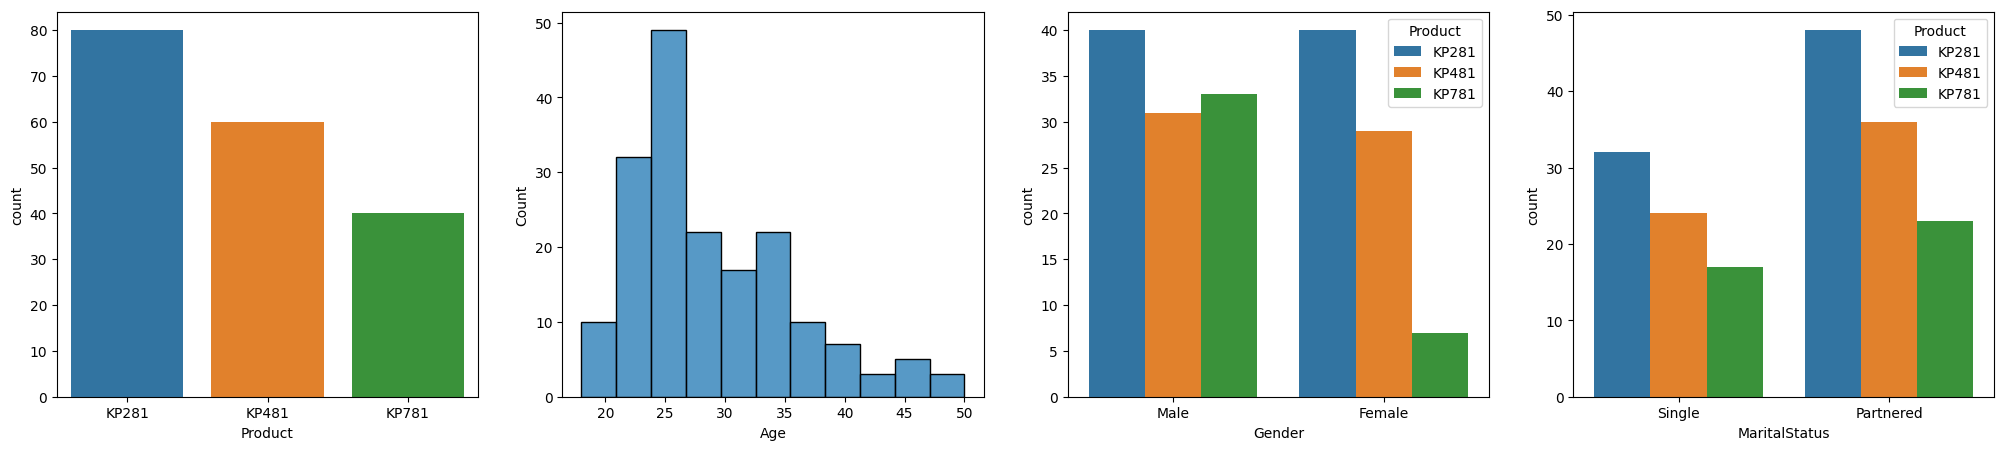

In [187]:
#Count and histplot for various parameters of the customers according to the product
plt.figure(figsize=(25,5))
plt.subplot(1,4,1)
sns.countplot(df,x="Product")

plt.subplot(1,4,2)
sns.histplot(df,x="Age")

plt.subplot(1,4,3)
sns.countplot(df,x="Gender",hue="Product")

plt.subplot(1,4,4)
sns.countplot(df,x="MaritalStatus",hue="Product")


<Axes: xlabel='Fitness', ylabel='count'>

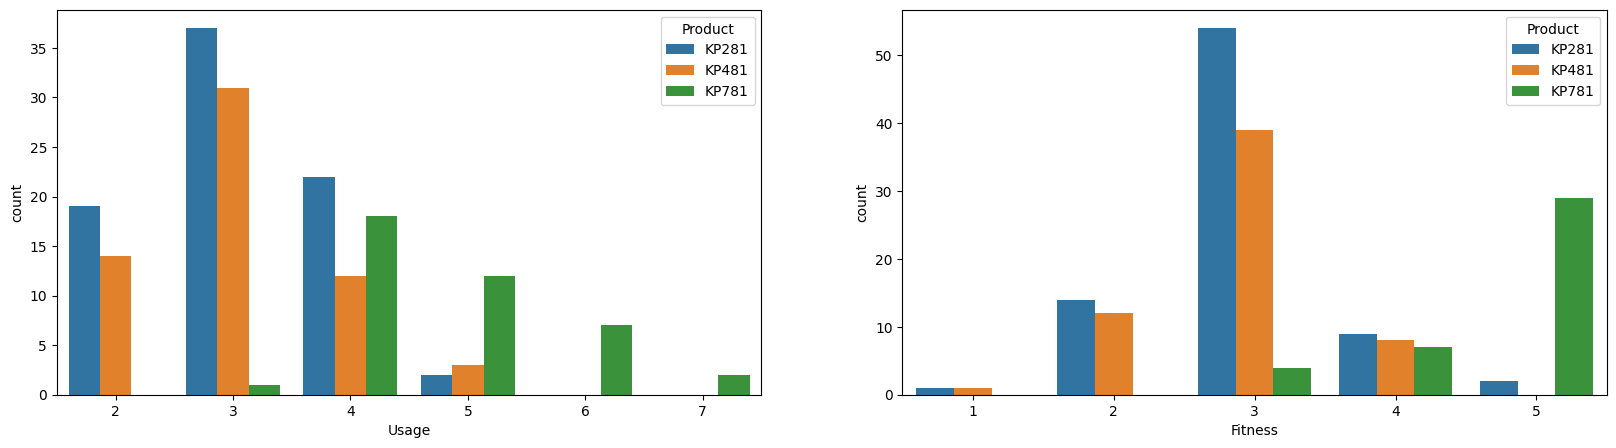

In [188]:
#Countplot for usage and fitness level of customers according to the product
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
sns.countplot(df,x="Usage",hue="Product")

plt.subplot(1,2,2)
sns.countplot(df,x="Fitness",hue="Product")

<Axes: xlabel='Income', ylabel='Count'>

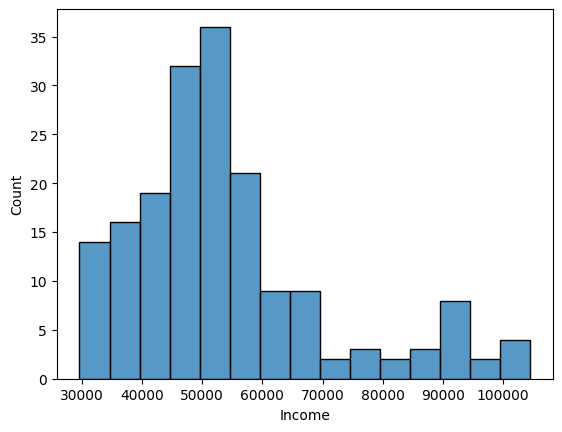

In [189]:
#Histogram for Income of the customers
sns.histplot(df,x="Income")

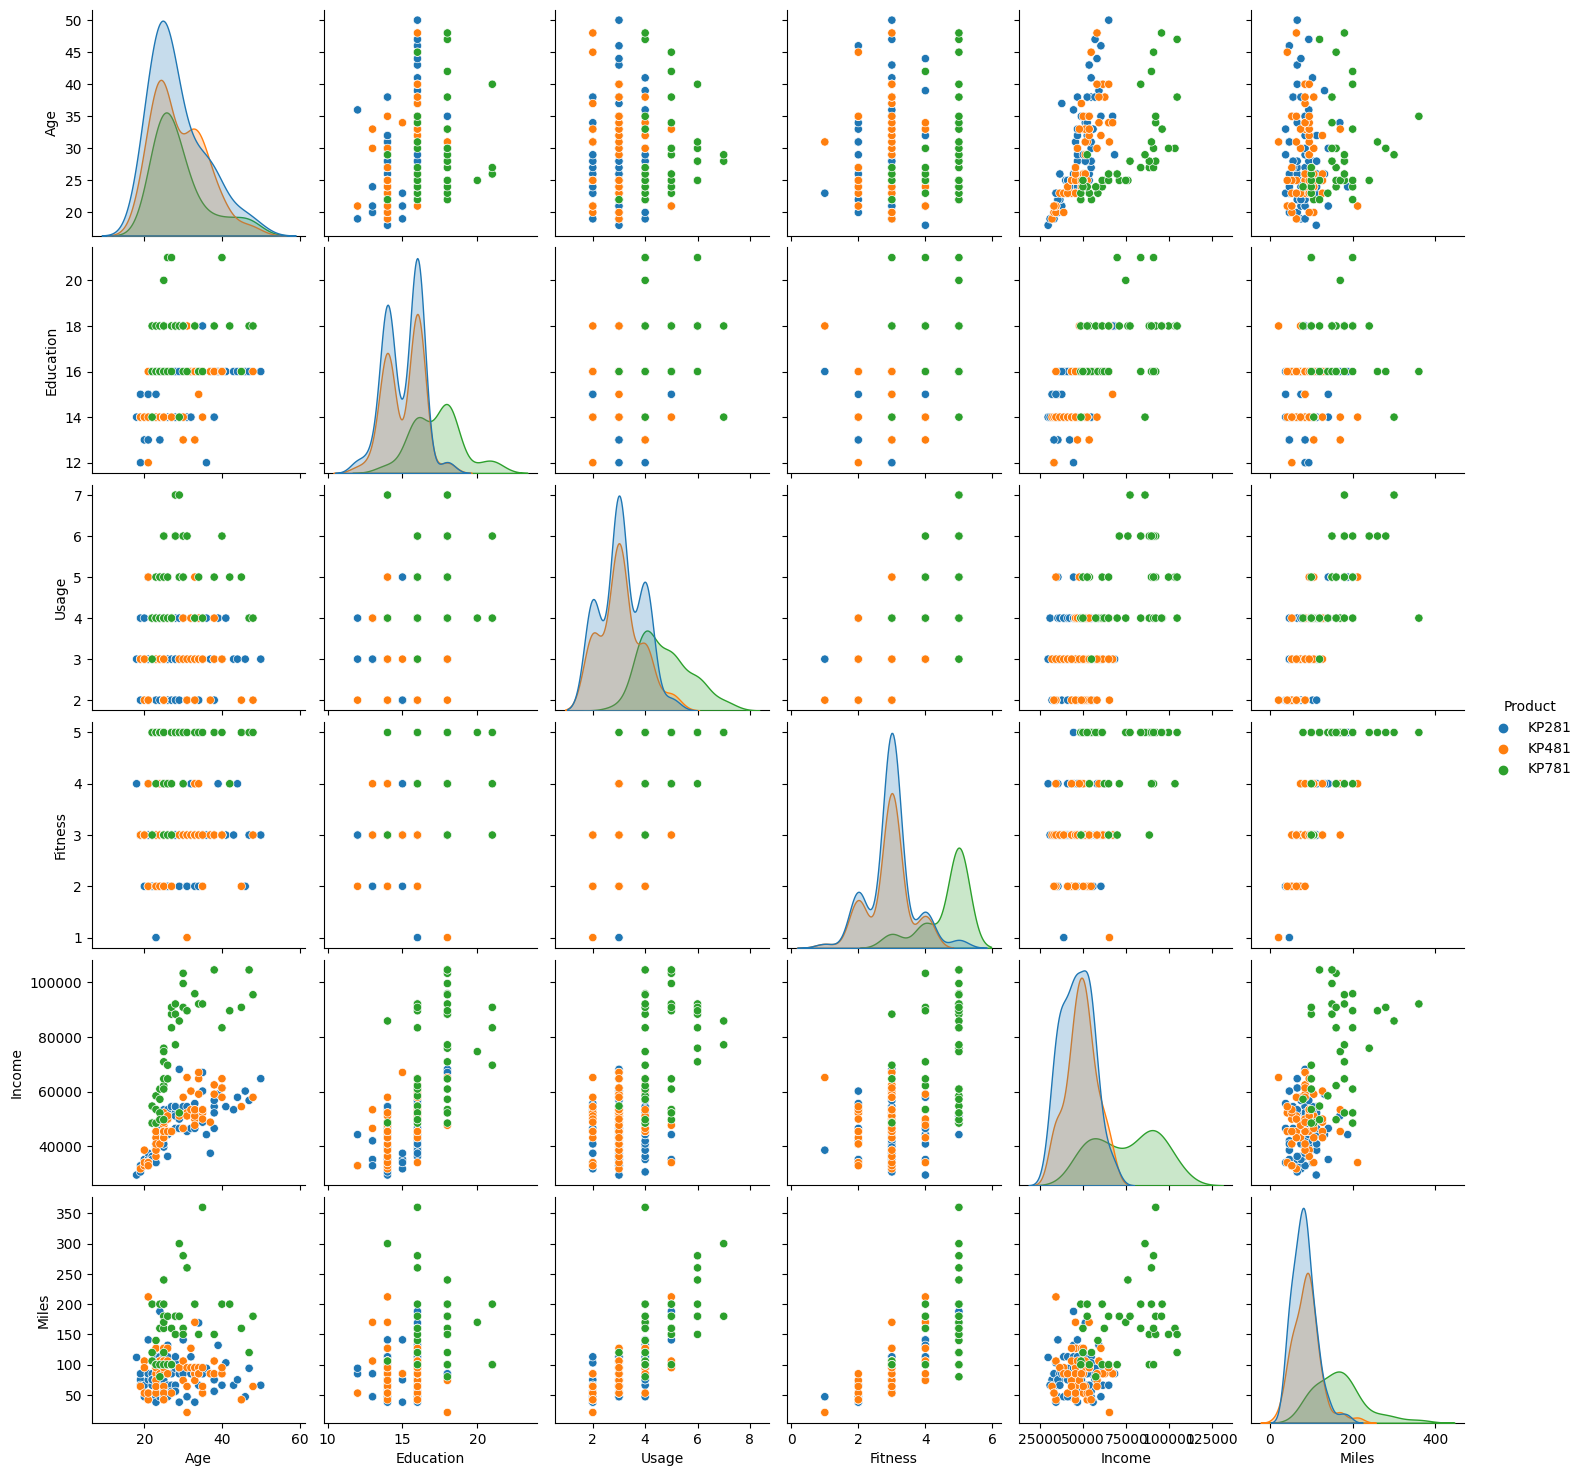

In [190]:
#Bivariate represenation of data and its correlation via pairplot
sns.pairplot(df,hue="Product")

<Axes: xlabel='Product', ylabel='Miles'>

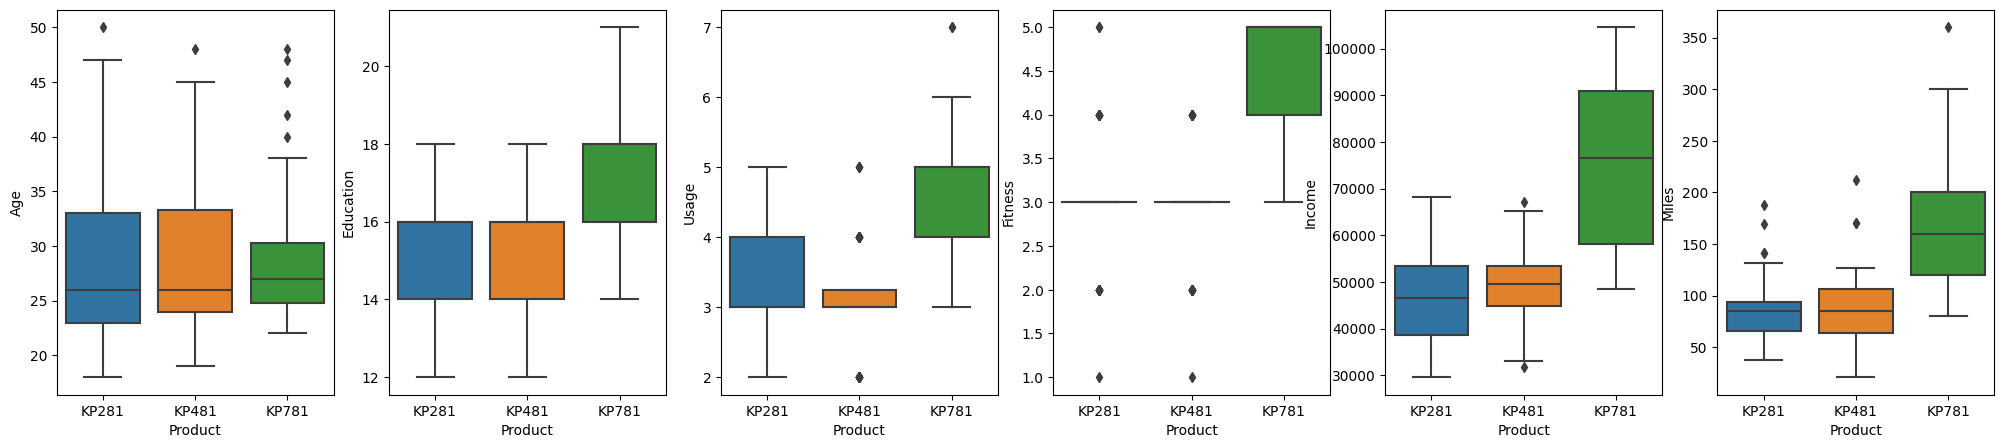

In [191]:
#Detecting outlier via boxplot
plt.figure(figsize=(25,5))
plt.subplot(1,6,1)
sns.boxplot(df,x="Product",y="Age")

plt.subplot(1,6,2)
sns.boxplot(df,x="Product",y="Education")

plt.subplot(1,6,3)
sns.boxplot(df,x="Product",y="Usage")

plt.subplot(1,6,4)
sns.boxplot(df,x="Product",y="Fitness")

plt.subplot(1,6,5)
sns.boxplot(df,x="Product",y="Income")

plt.subplot(1,6,6)
sns.boxplot(df,x="Product",y="Miles")

<Axes: xlabel='MaritalStatus', ylabel='Usage'>

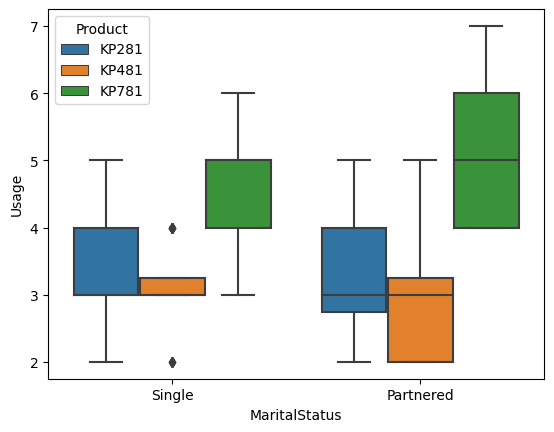

In [192]:
#Realtion between martital status and uage according to the product
sns.boxplot(df,x="MaritalStatus",y="Usage", hue="Product")

<ipython-input-193-c3ced707ba4e>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr())


<Axes: >

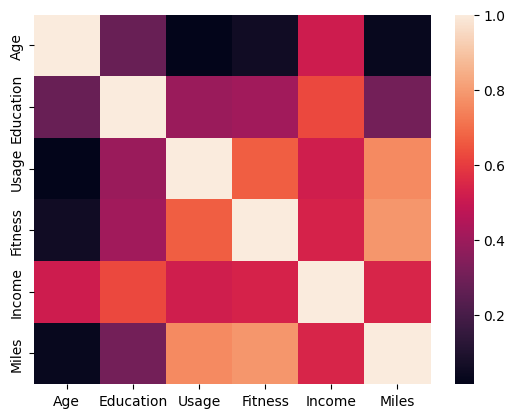

In [193]:
#Heatmap for attributes correlation
sns.heatmap(df.corr())

Probability and Percentages

In [194]:
round(pd.crosstab(df["Product"],df["Gender"],normalize=True,margins=True)*100,2)

Gender,Female,Male,All
Product,,,
KP281,22.22,22.22,44.44
KP481,16.11,17.22,33.33
KP781,3.89,18.33,22.22
All,42.22,57.78,100.00


In [195]:
round(pd.crosstab(df["Product"],df["Fitness"],normalize=True,margins=True)*100,2)

Fitness,1,2,3,4,5,All
Product,,,,,,
KP281,0.56,7.78,30.00,5.00,1.11,44.44
KP481,0.56,6.67,21.67,4.44,0.00,33.33
KP781,0.00,0.00,2.22,3.89,16.11,22.22
All,1.11,14.44,53.89,13.33,17.22,100.00


In [196]:
round(pd.crosstab(df["Product"],df["Usage"],normalize=True,margins=True)*100,2)

Usage,2,3,4,5,6,7,All
Product,,,,,,,
KP281,10.56,20.56,12.22,1.11,0.00,0.00,44.44
KP481,7.78,17.22,6.67,1.67,0.00,0.00,33.33
KP781,0.00,0.56,10.00,6.67,3.89,1.11,22.22
All,18.33,38.33,28.89,9.44,3.89,1.11,100.00


In [197]:
round(pd.crosstab(df["Gender"],df["Usage"],normalize=True,margins=True)*100,2)

Usage,2,3,4,5,6,7,All
Gender,,,,,,,
Female,11.11,18.33,7.78,3.89,1.11,0.00,42.22
Male,7.22,20.00,21.11,5.56,2.78,1.11,57.78
All,18.33,38.33,28.89,9.44,3.89,1.11,100.00


In [198]:
round(pd.crosstab(df["MaritalStatus"],df["Usage"],normalize=True,margins=True)*100,2)

Usage,2,3,4,5,6,7,All
MaritalStatus,,,,,,,
Partnered,12.22,22.22,16.11,5.00,2.78,1.11,59.44
Single,6.11,16.11,12.78,4.44,1.11,0.00,40.56
All,18.33,38.33,28.89,9.44,3.89,1.11,100.00


In [199]:
# Probability of buying KP281, KP481 and KP781 respectively given the customer is Male and Single 

df_male= df[(df["Gender"]=="Male") & (df["MaritalStatus"]=="Single")]
prob_m1= round((len(df_male[df_male["Product"]=="KP281"])/len(df_male)),2)

prob_m2= round((len(df_male[df_male["Product"]=="KP481"])/len(df_male)),2)

prob_m3= round((len(df_male[df_male["Product"]=="KP781"])/len(df_male)),2)

print(prob_m1)
print(prob_m2)
print(prob_m3)

0.44
0.23
0.33


In [200]:
# Probability of buying KP281, KP481 and KP781 respectively given the customer is Male and Partnered 

df_male1= df[(df["Gender"]=="Male") & (df["MaritalStatus"]=="Partnered")]
prob_mp1= round((len(df_male1[df_male1["Product"]=="KP281"])/len(df_male1)),2)

prob_mp2= round((len(df_male1[df_male1["Product"]=="KP481"])/len(df_male1)),2)

prob_mp3= round((len(df_male1[df_male1["Product"]=="KP781"])/len(df_male1)),2)

print(prob_mp1)
print(prob_mp2)
print(prob_mp3)

0.34
0.34
0.31


In [201]:
# Probability of buying KP281, KP481 and KP781 respectively given the customer is Female and Single 

df_female= df[(df["Gender"]=="Female") & (df["MaritalStatus"]=="Single")]
prob_f1= round((len(df_female[df_female["Product"]=="KP281"])/len(df_female)),2)

prob_f2= round((len(df_female[df_female["Product"]=="KP481"])/len(df_female)),2)

prob_f3= round((len(df_female[df_female["Product"]=="KP781"])/len(df_female)),2)

print(prob_f1)
print(prob_f2)
print(prob_f3)

0.43
0.47
0.1


In [202]:
# Probability of buying KP281, KP481 and KP781 respectively given the customer is Female and Partnered 

df_female1= df[(df["Gender"]=="Female") & (df["MaritalStatus"]=="Partnered")]
prob_fp1= round((len(df_female1[df_female1["Product"]=="KP281"])/len(df_female1)),2)

prob_fp2= round((len(df_female1[df_female1["Product"]=="KP481"])/len(df_female1)),2)

prob_fp3= round((len(df_female1[df_female1["Product"]=="KP781"])/len(df_female1)),2)

print(prob_fp1)
print(prob_fp2)
print(prob_fp3)

0.59
0.33
0.09


In [203]:
# Probability of buying KP281, KP481 and KP781 respectively given the customer is 25 years old and above 

df_age= df[(df["Age"]>=25)]
prob_a1= round(len(df_age[df_age["Product"]=="KP281"])/len(df_age),2)

prob_a2= round(len(df_age[df_age["Product"]=="KP481"])/len(df_age),2)

prob_a3= round(len(df_age[df_age["Product"]=="KP781"])/len(df_age),2)

print(prob_a1)
print(prob_a2)
print(prob_a3)

0.42
0.34
0.24


In [204]:
round(df["Income"].mean(),2)

53719.58

In [205]:
# Probability of buying KP281, KP481 and KP781 respectively given the income above 53720

df_income= df[(df["Income"]>53720)]
prob_i1= round(len(df_income[df_income["Product"]=="KP281"])/len(df_income),2)

prob_i2= round(len(df_income[df_income["Product"]=="KP481"])/len(df_income),2)

prob_i3= round(len(df_income[df_income["Product"]=="KP781"])/len(df_income),2)

print(prob_i1)
print(prob_i2)
print(prob_i3)

0.29
0.21
0.51


In [206]:
# Probability of buying KP281, KP481 and KP781 respectively given the income below 53720

df_income1= df[(df["Income"]<53720)]
prob_in1= round(len(df_income1[df_income1["Product"]=="KP281"])/len(df_income1),2)

prob_in2= round(len(df_income1[df_income1["Product"]=="KP481"])/len(df_income1),2)

prob_in3= round(len(df_income1[df_income1["Product"]=="KP781"])/len(df_income1),2)

print(prob_in1)
print(prob_in2)
print(prob_in3)

0.53
0.4
0.07


In [207]:
# Probability of buying KP281, KP481 and KP781 respectively given the Fitness level >= 3

df_fit= df[(df["Fitness"]>=3)]
prob_fit1= round(len(df_fit[df_fit["Product"]=="KP281"])/len(df_fit),2)

prob_fit2= round(len(df_fit[df_fit["Product"]=="KP481"])/len(df_fit),2)

prob_fit3= round(len(df_fit[df_fit["Product"]=="KP781"])/len(df_fit),2)

print(prob_fit1)
print(prob_fit2)
print(prob_fit3)

0.43
0.31
0.26


In [208]:
# Probability of buying KP281, KP481 and KP781 respectively given the Fitness level < 3

df_fit1= df[(df["Fitness"]<3)]
prob_fit1= round(len(df_fit1[df_fit1["Product"]=="KP281"])/len(df_fit1),2)

prob_fit2= round(len(df_fit1[df_fit1["Product"]=="KP481"])/len(df_fit1),2)

prob_fit3= round(len(df_fit1[df_fit1["Product"]=="KP781"])/len(df_fit1),2)

print(prob_fit1)
print(prob_fit2)
print(prob_fit3)

0.54
0.46
0.0


In [209]:
round(df["Miles"].mean(),2)

103.19

In [210]:
# Probability of buying KP281, KP481 and KP781 respectively given the miles>103

df_mile= df[(df["Miles"]>103)]
prob_m1= round(len(df_mile[df_mile["Product"]=="KP281"])/len(df_mile),2)

prob_m2= round(len(df_mile[df_mile["Product"]=="KP481"])/len(df_mile),2)

prob_m3= round(len(df_mile[df_mile["Product"]=="KP781"])/len(df_mile),2)

print(prob_m1)
print(prob_m2)
print(prob_m3)

0.24
0.25
0.51


Business Insights & Recommendations

**Insights:**


*   There are no null values in the data.
*   The most used product is KP281.
*   Most of the customers are 25 years old.
*   57.78 % of the customers are male and 42% of the customers are female.
*   59% of the customers are marries and others are single.
*   38%of the customers want to use ht eproduct  3 times a week.
*   Mored than 50%of the customers have rated themselves 3 on the fitness scale.
*   Income of the customers range from a minimum of 29562 toa maximum of 104581. However, most of them fall in the range of 50000 to 60000.
*   Customers with usage 3 and below prefer  KP281  and K481. However, customera with more usage i.e., above 3 prefer KP781.
*   Most of the customer with fitness level 3 prefer  KP281 & K481. Customer with fitness level 5 prefer  KP781.
*   There are outliers in age, usage, fitness and miles attributes of the data.
*   Customers with higher fitness level, higher income and higher expected mile to run prefer KP781.
*   Fitness & miles and usage & miles are highly correlated attributes. Customer who use the product more and expercts to run more miles ofter have good fitness level and vice versa.










**Customer Profile**

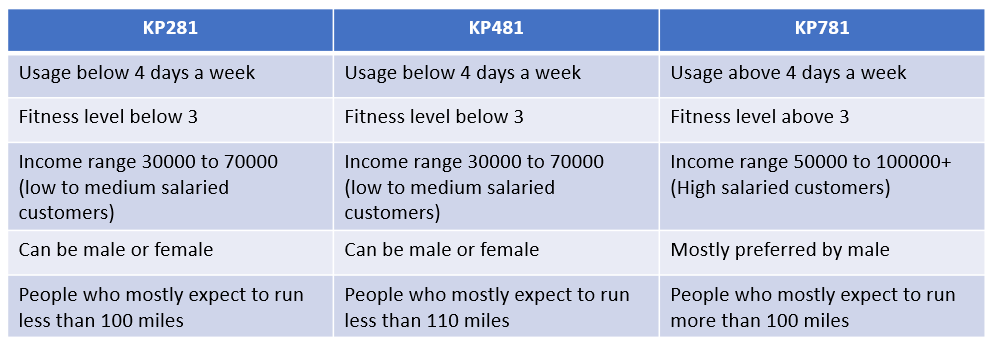

**Recommendations:**

*   KP281 and KP481 have more sales than KP781 and share almost similar characteristics of the customer profile.
*   Here we need to target medium salaried people who have an average fitness level or below. Since they are low to medium salaried people, we can plan some discounts or offers to increase sales further.
*   KP781 seems to be more suitable for fitness enthusiasts who are above average on the fitness scale and plan to use the product more.
*   Here we can focus more on high salaries male customers and females with high salaries and who have partners
